In [2]:
import numpy as np
import utils.dataset as dataset
import utils.plot_utils as plot_utils
%matplotlib ipympl

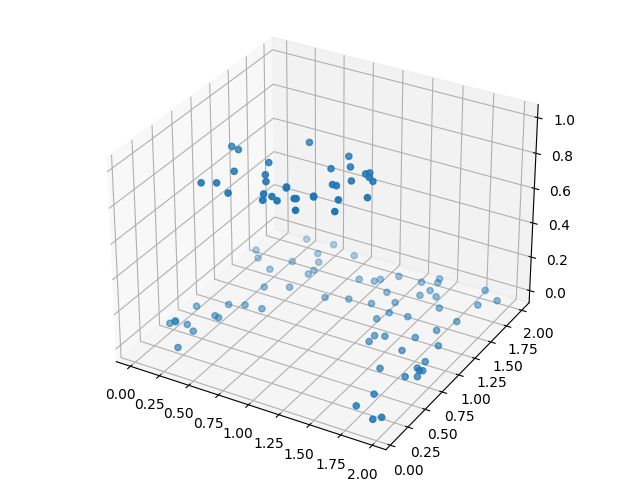

In [3]:
#从数据中获取随机豆豆
m=100
X,Y = dataset.get_beans6(m)
# print(X)
# print(Y)
plot_utils.show_scatter(X, Y)

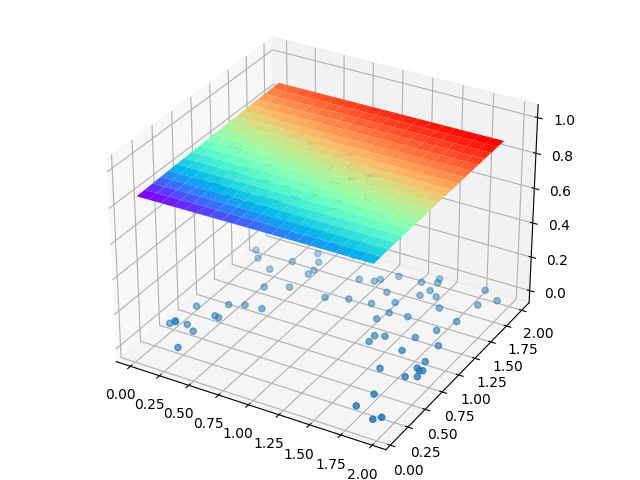

In [6]:
W1 = np.random.rand(2,2)
B1 = np.random.rand(1,2)
W2 = np.random.rand(1,2)
B2 = np.random.rand(1,1)

def sigmoid(X):
	return 1/(1+np.exp(-X))
def forward_propgation(X):
	#Z1:(m,2)
	#A1:(m,2)
	#Z2:(m,1)
	#A2:(m,1)
	Z1 = X.dot(W1.T) + B1
	A1 = sigmoid(Z1)
	Z2 = A1.dot(W2.T) + B2
	A2 = sigmoid(Z2)
	return A2,Z2,A1,Z1

plot_utils.show_scatter_surface(X, Y,forward_propgation)

![20220811180033_2022-08-11](https://cdn.jsdelivr.net/gh/Achuan-2/PicBed@pic/assets/08_2_vec_one_hidden_layer/20220811180033_2022-08-11.png)

In [7]:
alpha = 0.05
epoches = 5000
for epoch in range(epoches):
	for i in range(m):
		Xi = X[i]
		Yi = Y[i]

		# 前向传播
		A2,Z2,A1,Z1 = forward_propgation(Xi)
		E = (Yi - A2)**2


		# 反向传播
		# 求梯度
		dEdA2 = -2*(Yi-A2)
		dA2dZ2= A2*(1-A2)
		dZ2dW2 = A1
		dZ2B2 = 1
		dZ2dA1 = W2
		dA1dZ1 = A1*(1-A1)
		dZ1dW1 = Xi
		dZ1dB1 = 1

		dEdZ2 = dEdA2*dA2dZ2
		dEdW2 = dEdZ2*dZ2dW2
		dEdB2 = dEdZ2*dZ2B2
		dEdA1 = dEdZ2*dZ2dA1
		dEdZ1 = dEdA1*dA1dZ1
		#? 为什么是这个
		dEdW1 = (dEdZ1.T).dot(np.array([Xi]))
		# dEdW1 = dEdZ1*dZ1dW1
		dEdB1 = dEdZ1*dZ1dB1

		# 梯度下降
		W2 = W2 - alpha*dEdW2
		B2 = B2 - alpha*dEdB2
		W1 = W1 - alpha*dEdW1
		B1 = B1 - alpha*dEdB1
	
	#计算准确率
	A2,Z2,A1,Z1 = forward_propgation(X)
	A2 = np.around(A2)#四舍五入取出0.5分割线左右的分类结果
	A2 = A2.reshape(1,m)[0]
	accuracy = np.mean(np.equal(A2,Y))
	print(f"Epoch: {epoch},准确率：{accuracy}")



Epoch: 0,准确率：0.34
Epoch: 1,准确率：0.66
Epoch: 2,准确率：0.66
Epoch: 3,准确率：0.66
Epoch: 4,准确率：0.66
Epoch: 5,准确率：0.66
Epoch: 6,准确率：0.66
Epoch: 7,准确率：0.66
Epoch: 8,准确率：0.66
Epoch: 9,准确率：0.66
Epoch: 10,准确率：0.66
Epoch: 11,准确率：0.66
Epoch: 12,准确率：0.66
Epoch: 13,准确率：0.66
Epoch: 14,准确率：0.66
Epoch: 15,准确率：0.66
Epoch: 16,准确率：0.66
Epoch: 17,准确率：0.66
Epoch: 18,准确率：0.66
Epoch: 19,准确率：0.66
Epoch: 20,准确率：0.66
Epoch: 21,准确率：0.66
Epoch: 22,准确率：0.66
Epoch: 23,准确率：0.66
Epoch: 24,准确率：0.66
Epoch: 25,准确率：0.66
Epoch: 26,准确率：0.66
Epoch: 27,准确率：0.66
Epoch: 28,准确率：0.66
Epoch: 29,准确率：0.66
Epoch: 30,准确率：0.66
Epoch: 31,准确率：0.65
Epoch: 32,准确率：0.64
Epoch: 33,准确率：0.63
Epoch: 34,准确率：0.63
Epoch: 35,准确率：0.64
Epoch: 36,准确率：0.64
Epoch: 37,准确率：0.66
Epoch: 38,准确率：0.66
Epoch: 39,准确率：0.7
Epoch: 40,准确率：0.74
Epoch: 41,准确率：0.74
Epoch: 42,准确率：0.75
Epoch: 43,准确率：0.76
Epoch: 44,准确率：0.76
Epoch: 45,准确率：0.77
Epoch: 46,准确率：0.77
Epoch: 47,准确率：0.77
Epoch: 48,准确率：0.78
Epoch: 49,准确率：0.78
Epoch: 50,准确率：0.78
Epoch: 51,准确率：0.77
Epoch: 52,准确率：0.76
Epoc

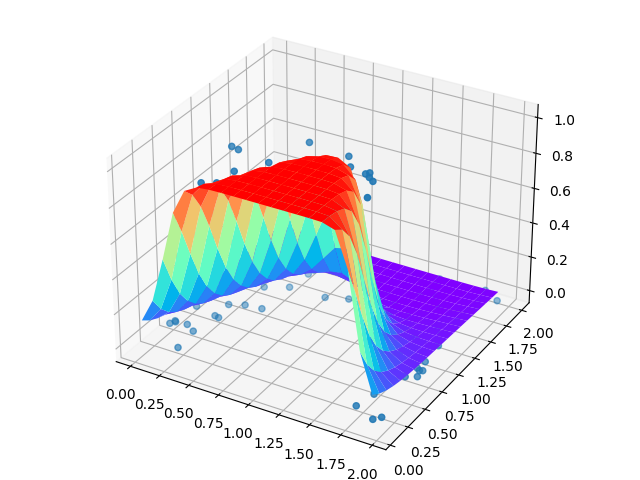

In [8]:
plot_utils.show_scatter_surface(X, Y,forward_propgation)